In [2]:
from datetime import datetime
import json
import os
import glob
import boto3
import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import StrMethodFormatter
from sodapy import Socrata

import seaborn as sns
%matplotlib inline
from IPython.display import HTML, display
from scipy.stats import zscore
# from sklearn.model_selection import train_test_split
import plotly_express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats

pio.renderers.default = "browser"
pio.templates.default = "plotly_white"

In [3]:
def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)
    except:        
        return ''

In [19]:
years = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]

In [42]:
def group_by_agency(agency_name):
    if agency_name == "Department of Housing Preservation and Development":
        return "Housing"
    elif agency_name == "Department of Health and Mental Hygiene":
        return "Health"
    elif agency_name == "New York City Police Department":
        return "Police"
    elif agency_name == "Department of Sanitation":
        return "Sanitation"
    elif agency_name == "Department of Transportation":
        return "Transportation"
    elif agency_name == "Department of Parks and Recreation":
        return "Parks"
    elif agency_name == "Department of Environmental Protection":
        return "Environmental"
    elif agency_name == "Department of Buildings":
        return "Buildings"
    elif agency_name == "Department of Information Technology and Telecommunications":
        return "Technology"
    elif "Taxi" in agency_name:
        return "Taxis"
    elif "School" in agency_name:
        return "Schools"
    else:
        return "Other"

In [477]:
x = datetime(2020, 5, 17)

def get_hour(created_date):
    date = pd.to_datetime(created_date)
    if date.time() != x.time():
        return date.hour
    else:
        return ''

In [478]:
#concat all 2010 files into one dataframe
path = './data/2010'
files_2010 = glob.glob(path + '/2010*.csv')

df_list_2010 = (pd.read_csv(file, usecols=['unique_key','created_date','closed_date','agency','agency_name','complaint_type','descriptor','location_type','incident_zip','borough'],converters={'unique_key': convert_dtype,'created_date': convert_dtype,'closed_date': convert_dtype,'agency': convert_dtype,'agency_name': convert_dtype,'complaint_type': convert_dtype,'descriptor': convert_dtype,'location_type': convert_dtype,'incident_zip': convert_dtype,'borough': convert_dtype}) for file in files_2010)

services_2010 = pd.concat(df_list_2010, ignore_index=True)

services_2010['grouped_agency'] = services_2010["agency_name"].apply(group_by_agency)

services_2010['hour'] = services_2010["created_date"].apply(get_hour)

#services_2010.head()

In [481]:
#concat all 2011 files into one dataframe
path = './data/2011'
files_2011 = glob.glob(path + '/2011*.csv')

df_list_2011 = (pd.read_csv(file, usecols=['unique_key','created_date','closed_date','agency','agency_name','complaint_type','descriptor','location_type','incident_zip','borough'],converters={'unique_key': convert_dtype,'created_date': convert_dtype,'closed_date': convert_dtype,'agency': convert_dtype,'agency_name': convert_dtype,'complaint_type': convert_dtype,'descriptor': convert_dtype,'location_type': convert_dtype,'incident_zip': convert_dtype,'borough': convert_dtype}) for file in files_2011)

services_2011 = pd.concat(df_list_2011, ignore_index=True)

services_2011['grouped_agency'] = services_2011["agency_name"].apply(group_by_agency)

services_2011['hour'] = services_2011["created_date"].apply(get_hour)

#services_2011.head()

In [482]:
#concat all 2012 files into one dataframe
path = './data/2012'
files_2012 = glob.glob(path + '/2012*.csv')

df_list_2012 = (pd.read_csv(file, usecols=['unique_key','created_date','closed_date','agency','agency_name','complaint_type','descriptor','location_type','incident_zip','borough'],converters={'unique_key': convert_dtype,'created_date': convert_dtype,'closed_date': convert_dtype,'agency': convert_dtype,'agency_name': convert_dtype,'complaint_type': convert_dtype,'descriptor': convert_dtype,'location_type': convert_dtype,'incident_zip': convert_dtype,'borough': convert_dtype}) for file in files_2012)

services_2012 = pd.concat(df_list_2012, ignore_index=True)

services_2012['grouped_agency'] = services_2012["agency_name"].apply(group_by_agency)

services_2012['hour'] = services_2012["created_date"].apply(get_hour)

#services_2012.head()

In [483]:
#concat all 2013 files into one dataframe
path = './data/2013'
files_2013 = glob.glob(path + '/2013*.csv')

df_list_2013 = (pd.read_csv(file, usecols=['unique_key','created_date','closed_date','agency','agency_name','complaint_type','descriptor','location_type','incident_zip','borough'],converters={'unique_key': convert_dtype,'created_date': convert_dtype,'closed_date': convert_dtype,'agency': convert_dtype,'agency_name': convert_dtype,'complaint_type': convert_dtype,'descriptor': convert_dtype,'location_type': convert_dtype,'incident_zip': convert_dtype,'borough': convert_dtype}) for file in files_2013)

services_2013 = pd.concat(df_list_2013, ignore_index=True)

services_2013['grouped_agency'] = services_2013["agency_name"].apply(group_by_agency)

services_2013['hour'] = services_2013["created_date"].apply(get_hour)

#services_2013.head()

In [484]:
#concat all 2014 files into one dataframe
path = './data/2014'
files_2014 = glob.glob(path + '/2014*.csv')

df_list_2014 = (pd.read_csv(file, usecols=['unique_key','created_date','closed_date','agency','agency_name','complaint_type','descriptor','location_type','incident_zip','borough'],converters={'unique_key': convert_dtype,'created_date': convert_dtype,'closed_date': convert_dtype,'agency': convert_dtype,'agency_name': convert_dtype,'complaint_type': convert_dtype,'descriptor': convert_dtype,'location_type': convert_dtype,'incident_zip': convert_dtype,'borough': convert_dtype}) for file in files_2014)

services_2014 = pd.concat(df_list_2014, ignore_index=True)

services_2014['grouped_agency'] = services_2014["agency_name"].apply(group_by_agency)

services_2014['hour'] = services_2014["created_date"].apply(get_hour)

#services_2014.head()

In [485]:
#concat all 2015 files into one dataframe
path = './data/2015'
files_2015 = glob.glob(path + '/2015*.csv')

df_list_2015 = (pd.read_csv(file, usecols=['unique_key','created_date','closed_date','agency','agency_name','complaint_type','descriptor','location_type','incident_zip','borough'],converters={'unique_key': convert_dtype,'created_date': convert_dtype,'closed_date': convert_dtype,'agency': convert_dtype,'agency_name': convert_dtype,'complaint_type': convert_dtype,'descriptor': convert_dtype,'location_type': convert_dtype,'incident_zip': convert_dtype,'borough': convert_dtype}) for file in files_2015)

services_2015 = pd.concat(df_list_2015, ignore_index=True)

services_2015['grouped_agency'] = services_2015["agency_name"].apply(group_by_agency)

services_2015['hour'] = services_2015["created_date"].apply(get_hour)

#services_2015.head()

In [486]:
#concat all 2016 files into one dataframe
path = './data/2016'
files_2016 = glob.glob(path + '/2016*.csv')

df_list_2016 = (pd.read_csv(file, usecols=['unique_key','created_date','closed_date','agency','agency_name','complaint_type','descriptor','location_type','incident_zip','borough'],converters={'unique_key': convert_dtype,'created_date': convert_dtype,'closed_date': convert_dtype,'agency': convert_dtype,'agency_name': convert_dtype,'complaint_type': convert_dtype,'descriptor': convert_dtype,'location_type': convert_dtype,'incident_zip': convert_dtype,'borough': convert_dtype}) for file in files_2016)

services_2016 = pd.concat(df_list_2016, ignore_index=True)

services_2016['grouped_agency'] = services_2016["agency_name"].apply(group_by_agency)

services_2016['hour'] = services_2016["created_date"].apply(get_hour)

#services_2016.head()

In [487]:
#concat all 2017 files into one dataframe
path = './data/2017'
files_2017 = glob.glob(path + '/2017*.csv')

df_list_2017 = (pd.read_csv(file, usecols=['unique_key','created_date','closed_date','agency','agency_name','complaint_type','descriptor','location_type','incident_zip','borough'],converters={'unique_key': convert_dtype,'created_date': convert_dtype,'closed_date': convert_dtype,'agency': convert_dtype,'agency_name': convert_dtype,'complaint_type': convert_dtype,'descriptor': convert_dtype,'location_type': convert_dtype,'incident_zip': convert_dtype,'borough': convert_dtype}) for file in files_2017)

services_2017 = pd.concat(df_list_2017, ignore_index=True)

services_2017['grouped_agency'] = services_2017["agency_name"].apply(group_by_agency)

services_2017['hour'] = services_2017["created_date"].apply(get_hour)

#services_2017.head()

In [488]:
#concat all 2018 files into one dataframe
path = './data/2018'
files_2018 = glob.glob(path + '/2018*.csv')

df_list_2018 = (pd.read_csv(file, usecols=['unique_key','created_date','closed_date','agency','agency_name','complaint_type','descriptor','location_type','incident_zip','borough'],converters={'unique_key': convert_dtype,'created_date': convert_dtype,'closed_date': convert_dtype,'agency': convert_dtype,'agency_name': convert_dtype,'complaint_type': convert_dtype,'descriptor': convert_dtype,'location_type': convert_dtype,'incident_zip': convert_dtype,'borough': convert_dtype}) for file in files_2018)

services_2018 = pd.concat(df_list_2018, ignore_index=True)

services_2018['grouped_agency'] = services_2018["agency_name"].apply(group_by_agency)

services_2018['hour'] = services_2018["created_date"].apply(get_hour)

#services_2018.head()

In [489]:
#concat all 2019 files into one dataframe
path = './data/2019'
files_2019 = glob.glob(path + '/2019*.csv')

df_list_2019 = (pd.read_csv(file, usecols=['unique_key','created_date','closed_date','agency','agency_name','complaint_type','descriptor','location_type','incident_zip','borough'],converters={'unique_key': convert_dtype,'created_date': convert_dtype,'closed_date': convert_dtype,'agency': convert_dtype,'agency_name': convert_dtype,'complaint_type': convert_dtype,'descriptor': convert_dtype,'location_type': convert_dtype,'incident_zip': convert_dtype,'borough': convert_dtype}) for file in files_2019)

services_2019 = pd.concat(df_list_2019, ignore_index=True)

services_2019['grouped_agency'] = services_2019["agency_name"].apply(group_by_agency)

services_2019['hour'] = services_2019["created_date"].apply(get_hour)

#services_2019.head()

In [490]:
#concat all 2020 files into one dataframe
path = './data/2020'
files_2020 = glob.glob(path + '/2020*.csv')

df_list_2020 = (pd.read_csv(file, usecols=['unique_key','created_date','closed_date','agency','agency_name','complaint_type','descriptor','location_type','incident_zip','borough'],converters={'unique_key': convert_dtype,'created_date': convert_dtype,'closed_date': convert_dtype,'agency': convert_dtype,'agency_name': convert_dtype,'complaint_type': convert_dtype,'descriptor': convert_dtype,'location_type': convert_dtype,'incident_zip': convert_dtype,'borough': convert_dtype}) for file in files_2020)

services_2020 = pd.concat(df_list_2020, ignore_index=True)

services_2020['grouped_agency'] = services_2020["agency_name"].apply(group_by_agency)

services_2020['hour'] = services_2020["created_date"].apply(get_hour)

#services_2020.head()

In [491]:
#concat all 2021 files into one dataframe
path = './data/2021'
files_2021 = glob.glob(path + '/2021*.csv')

df_list_2021 = (pd.read_csv(file, usecols=['unique_key','created_date','closed_date','agency','agency_name','complaint_type','descriptor','location_type','incident_zip','borough'],converters={'unique_key': convert_dtype,'created_date': convert_dtype,'closed_date': convert_dtype,'agency': convert_dtype,'agency_name': convert_dtype,'complaint_type': convert_dtype,'descriptor': convert_dtype,'location_type': convert_dtype,'incident_zip': convert_dtype,'borough': convert_dtype}) for file in files_2021)

services_2021 = pd.concat(df_list_2021, ignore_index=True)

services_2021['grouped_agency'] = services_2021["agency_name"].apply(group_by_agency)

services_2021['hour'] = services_2021["created_date"].apply(get_hour)

#services_2021.head()

In [492]:
#concat all 2022 files into one dataframe
path = './data/2022'
files_2022 = glob.glob(path + '/2022*.csv')

df_list_2022 = (pd.read_csv(file, usecols=['unique_key','created_date','closed_date','agency','agency_name','complaint_type','descriptor','location_type','incident_zip','borough'],converters={'unique_key': convert_dtype,'created_date': convert_dtype,'closed_date': convert_dtype,'agency': convert_dtype,'agency_name': convert_dtype,'complaint_type': convert_dtype,'descriptor': convert_dtype,'location_type': convert_dtype,'incident_zip': convert_dtype,'borough': convert_dtype}) for file in files_2022)

services_2022 = pd.concat(df_list_2022, ignore_index=True)

services_2022['grouped_agency'] = services_2022["agency_name"].apply(group_by_agency)

services_2022['hour'] = services_2022["created_date"].apply(get_hour)

#services_2022.head()

In [190]:
#Get total requests per year
services_total_year = pd.DataFrame({"year":["2010", 
                                            "2011", 
                                            "2012", 
                                            "2013", 
                                            "2014", 
                                            "2015", 
                                            "2016", 
                                            "2017", 
                                            "2018", 
                                            "2019", 
                                            "2020", 
                                            "2021", 
                                            "2022"],
                                    "total_requests":[len(services_2010)/1000000,
                                                      len(services_2011)/1000000,
                                                      len(services_2012)/1000000,
                                                      len(services_2013)/1000000,
                                                      len(services_2014)/1000000,
                                                      len(services_2015)/1000000,
                                                      len(services_2016)/1000000,
                                                      len(services_2017)/1000000,
                                                      len(services_2018)/1000000,
                                                      len(services_2019)/1000000,
                                                      len(services_2020)/1000000,
                                                      len(services_2021)/1000000,
                                                      len(services_2022)/1000000]
                                   })

#services_total_year

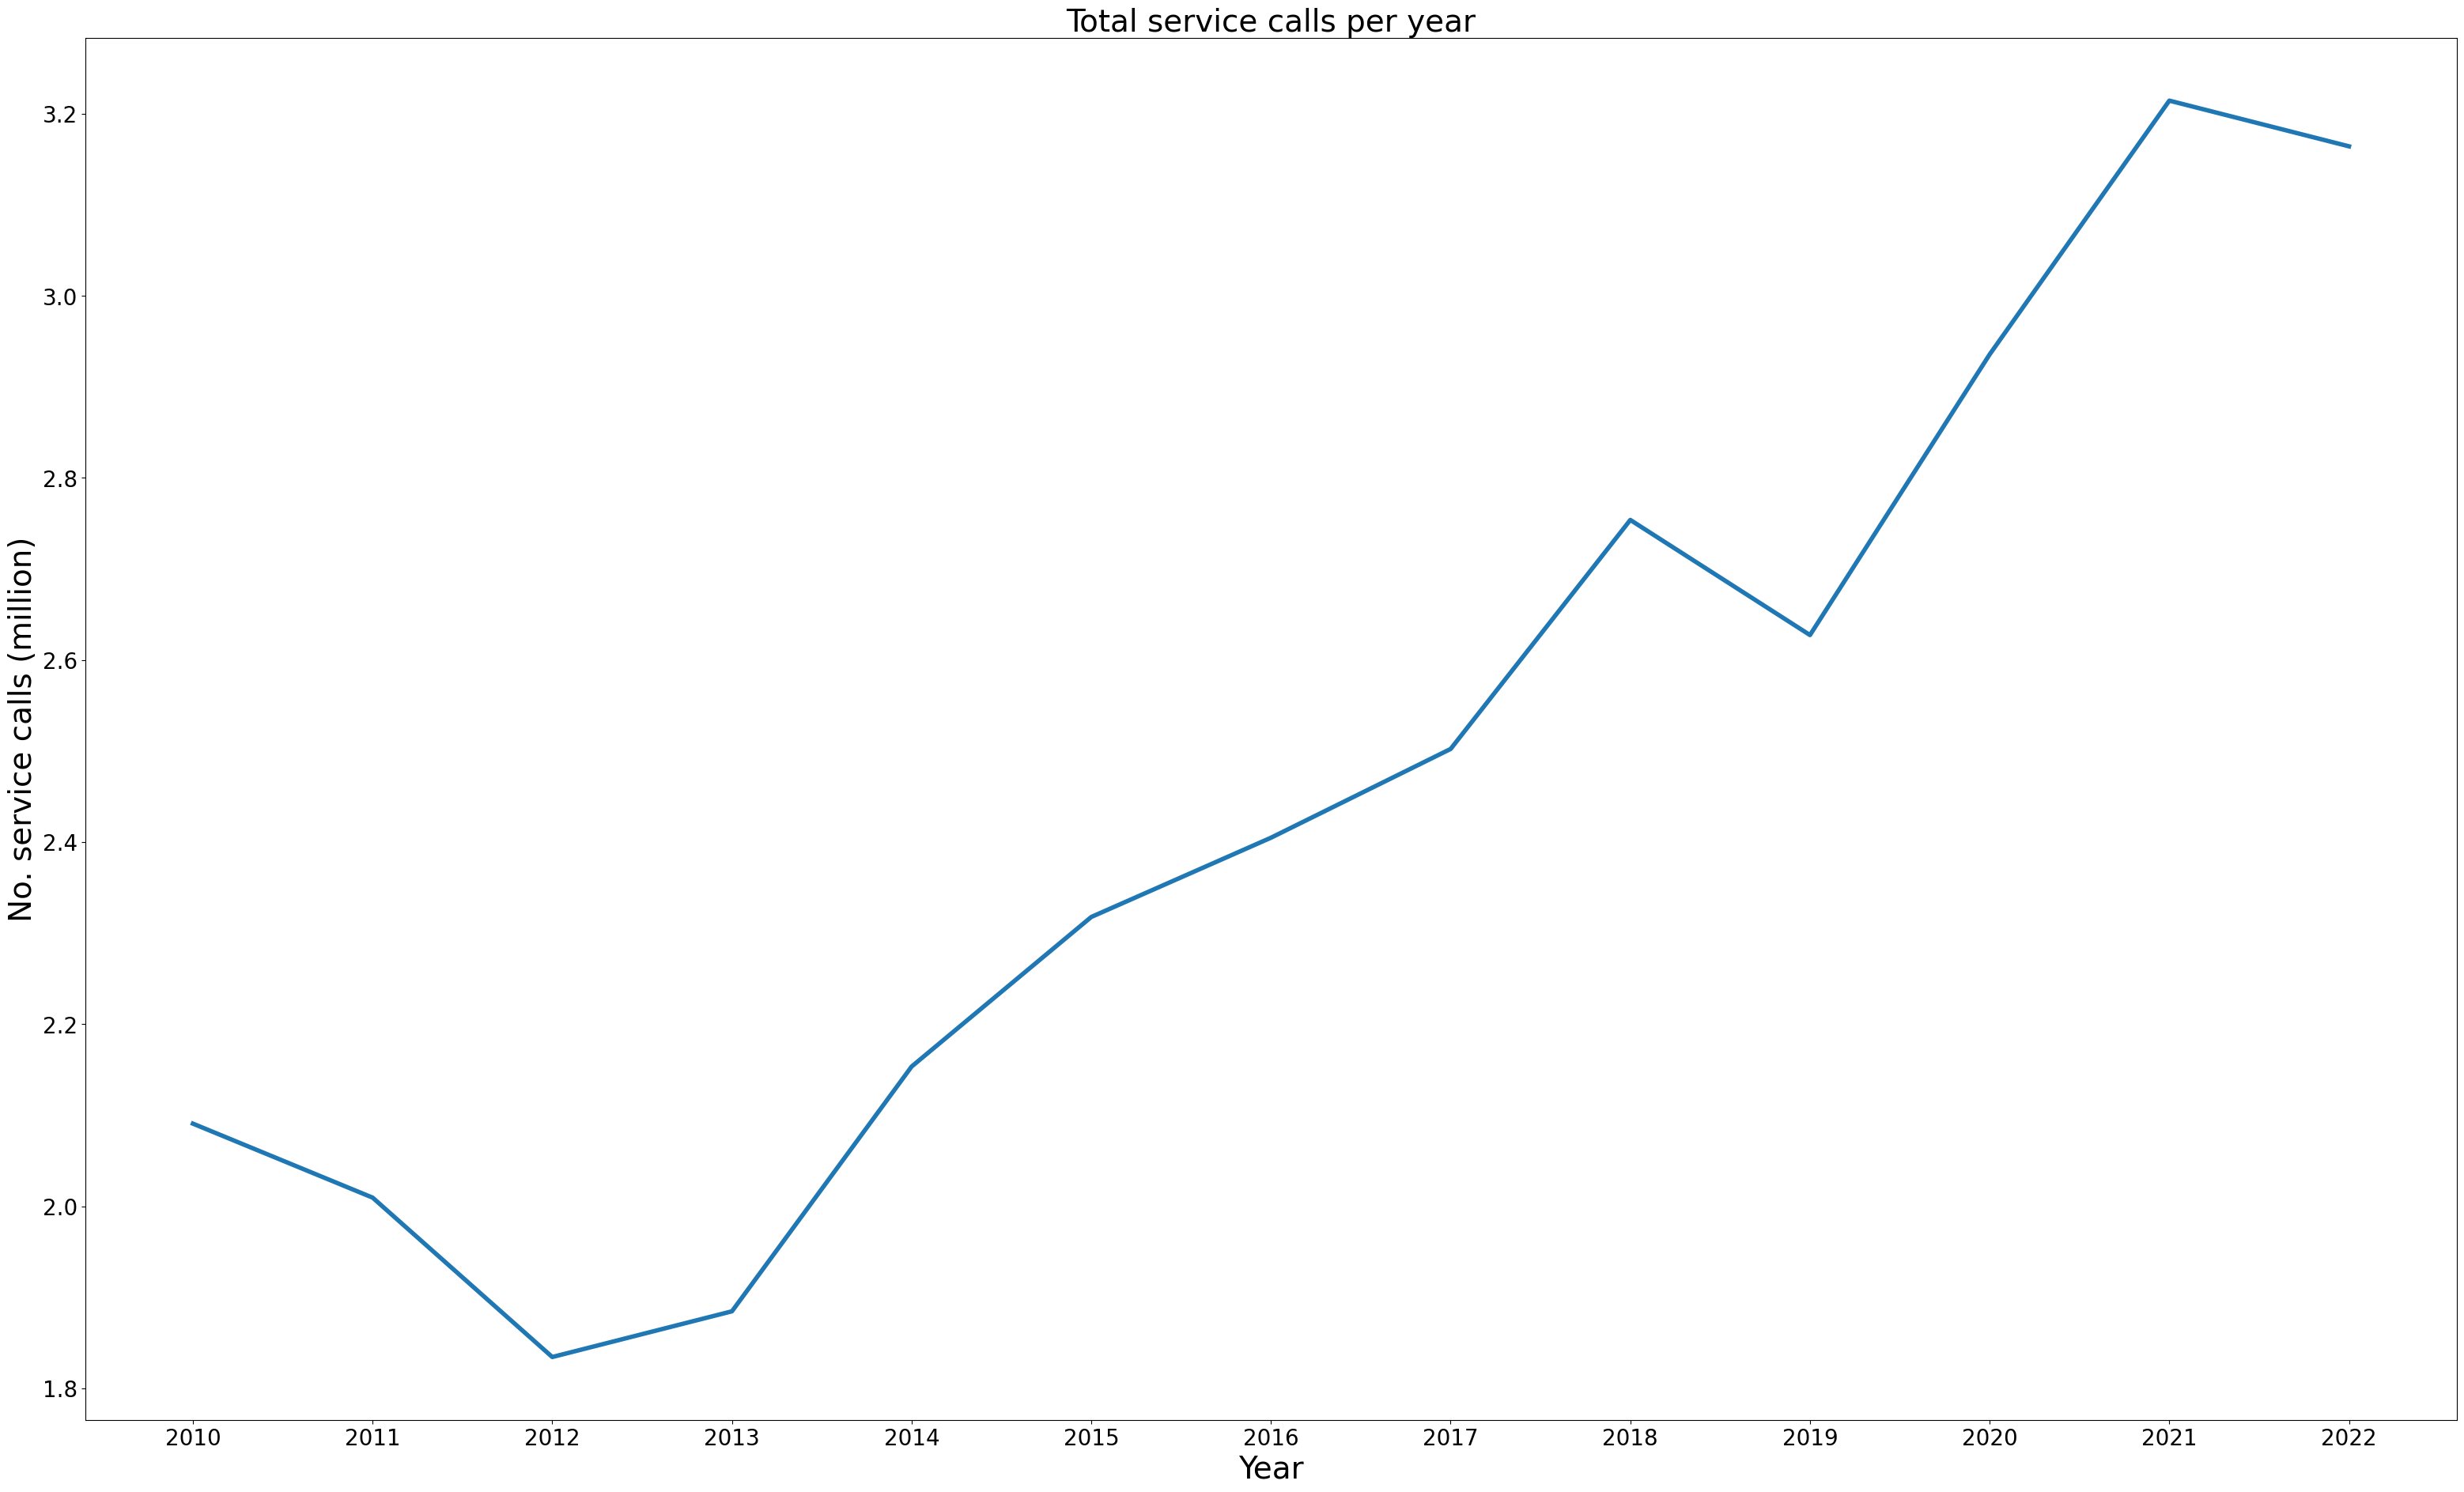

In [344]:
fig, ax = plt.subplots(figsize=(38.7,22.7))

ax.set_title('Total service calls per year',fontsize=28)
ax.set_xlabel('Year',fontsize=28)
ax.set_ylabel('No. service calls (million)',fontsize=28)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax.plot(services_total_year['year'],services_total_year['total_requests'],linewidth=4)

In [380]:
services_grouped_2010 = pd.DataFrame(services_2010['grouped_agency'].value_counts()).rename(columns={'grouped_agency':'2010'}).T
services_grouped_2011 = pd.DataFrame(services_2011['grouped_agency'].value_counts()).rename(columns={'grouped_agency':'2011'}).T
services_grouped_2012 = pd.DataFrame(services_2012['grouped_agency'].value_counts()).rename(columns={'grouped_agency':'2012'}).T
services_grouped_2013 = pd.DataFrame(services_2013['grouped_agency'].value_counts()).rename(columns={'grouped_agency':'2013'}).T
services_grouped_2014 = pd.DataFrame(services_2014['grouped_agency'].value_counts()).rename(columns={'grouped_agency':'2014'}).T
services_grouped_2015 = pd.DataFrame(services_2015['grouped_agency'].value_counts()).rename(columns={'grouped_agency':'2015'}).T
services_grouped_2016 = pd.DataFrame(services_2016['grouped_agency'].value_counts()).rename(columns={'grouped_agency':'2016'}).T
services_grouped_2017 = pd.DataFrame(services_2017['grouped_agency'].value_counts()).rename(columns={'grouped_agency':'2017'}).T
services_grouped_2018 = pd.DataFrame(services_2018['grouped_agency'].value_counts()).rename(columns={'grouped_agency':'2018'}).T
services_grouped_2019 = pd.DataFrame(services_2019['grouped_agency'].value_counts()).rename(columns={'grouped_agency':'2019'}).T
services_grouped_2020 = pd.DataFrame(services_2020['grouped_agency'].value_counts()).rename(columns={'grouped_agency':'2020'}).T
services_grouped_2021 = pd.DataFrame(services_2021['grouped_agency'].value_counts()).rename(columns={'grouped_agency':'2021'}).T
services_grouped_2022 = pd.DataFrame(services_2022['grouped_agency'].value_counts()).rename(columns={'grouped_agency':'2022'}).T

services_grouped_per_year = services_grouped_2010.append([services_grouped_2011,
                                                          services_grouped_2012,
                                                          services_grouped_2013,
                                                          services_grouped_2014,
                                                          services_grouped_2015,
                                                          services_grouped_2016,
                                                          services_grouped_2017,
                                                          services_grouped_2018,
                                                          services_grouped_2019,
                                                          services_grouped_2020,
                                                          services_grouped_2021,
                                                          services_grouped_2022])

#services_grouped_per_year

/var/folders/pg/zlf6czm17_1310xd40tz8c5h0000gn/T/ipykernel_13793/3267587214.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



(0.0, 1400000.0)

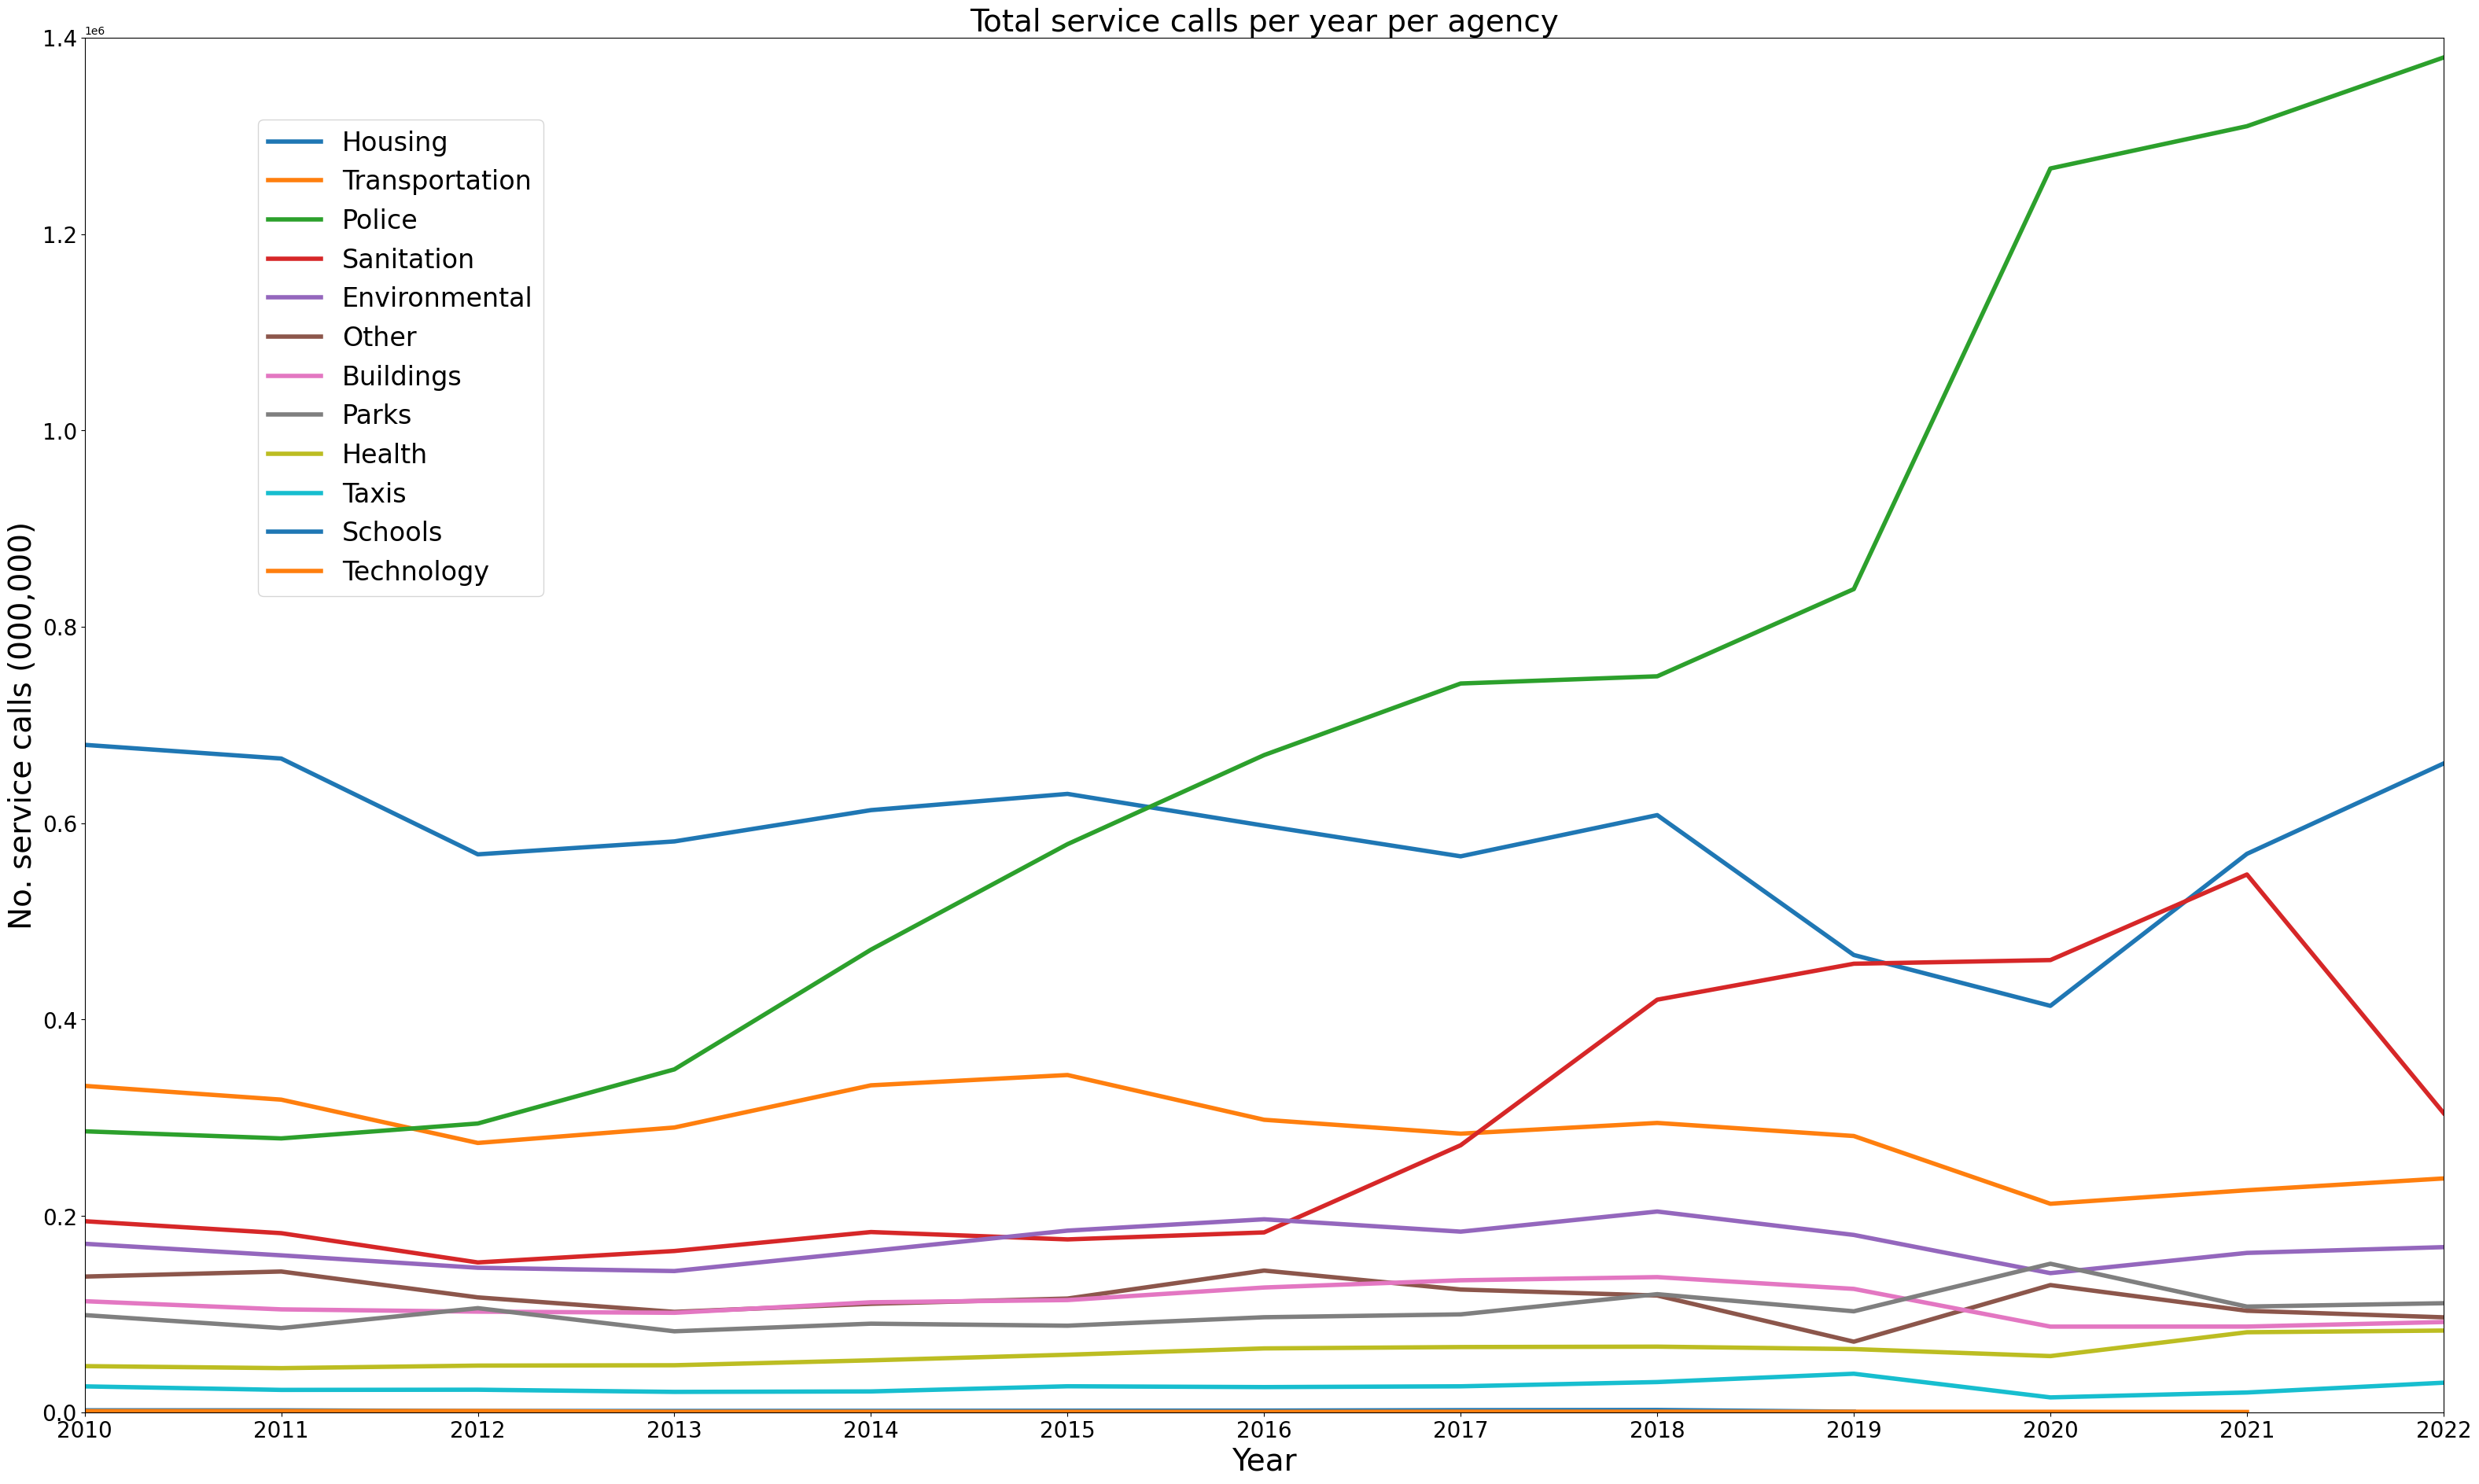

In [360]:
fig, ax = plt.subplots(figsize=(38.7,22.7))

ax.set_title('Total service calls per year per agency',fontsize=28)
ax.set_xlabel('Year',fontsize=28)
ax.set_ylabel('No. service calls (000,000)',fontsize=28)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax.plot(services_grouped_per_year['Housing'],linewidth=4,label='Housing')
ax.plot(services_grouped_per_year['Transportation'],linewidth=4,label='Transportation')
ax.plot(services_grouped_per_year['Police'],linewidth=4,label='Police')
ax.plot(services_grouped_per_year['Sanitation'],linewidth=4,label='Sanitation')
ax.plot(services_grouped_per_year['Environmental'],linewidth=4,label='Environmental')
ax.plot(services_grouped_per_year['Other'],linewidth=4,label='Other')
ax.plot(services_grouped_per_year['Buildings'],linewidth=4,label='Buildings')
ax.plot(services_grouped_per_year['Parks'],linewidth=4,label='Parks')
ax.plot(services_grouped_per_year['Health'],linewidth=4,label='Health')
ax.plot(services_grouped_per_year['Taxis'],linewidth=4,label='Taxis')
ax.plot(services_grouped_per_year['Schools'],linewidth=4,label='Schools')
ax.plot(services_grouped_per_year['Technology'],linewidth=4,label='Technology')
ax.legend(bbox_to_anchor=(0.2,0.95),fontsize=24)
plt.margins(0)
plt.ylim(0, 1400000)

In [379]:
services_borough_2010 = pd.DataFrame(services_2010['borough'].value_counts()).rename(columns={'borough':'2010'}).T
services_borough_2011 = pd.DataFrame(services_2011['borough'].value_counts()).rename(columns={'borough':'2011'}).T
services_borough_2012 = pd.DataFrame(services_2012['borough'].value_counts()).rename(columns={'borough':'2012'}).T
services_borough_2013 = pd.DataFrame(services_2013['borough'].value_counts()).rename(columns={'borough':'2013'}).T
services_borough_2014 = pd.DataFrame(services_2014['borough'].value_counts()).rename(columns={'borough':'2014'}).T
services_borough_2015 = pd.DataFrame(services_2015['borough'].value_counts()).rename(columns={'borough':'2015'}).T
services_borough_2016 = pd.DataFrame(services_2016['borough'].value_counts()).rename(columns={'borough':'2016'}).T
services_borough_2017 = pd.DataFrame(services_2017['borough'].value_counts()).rename(columns={'borough':'2017'}).T
services_borough_2018 = pd.DataFrame(services_2018['borough'].value_counts()).rename(columns={'borough':'2018'}).T
services_borough_2019 = pd.DataFrame(services_2019['borough'].value_counts()).rename(columns={'borough':'2019'}).T
services_borough_2020 = pd.DataFrame(services_2020['borough'].value_counts()).rename(columns={'borough':'2020'}).T
services_borough_2021 = pd.DataFrame(services_2021['borough'].value_counts()).rename(columns={'borough':'2021'}).T
services_borough_2022 = pd.DataFrame(services_2022['borough'].value_counts()).rename(columns={'borough':'2022'}).T

services_borough_per_year = services_borough_2010.append([services_borough_2011,
                                                          services_borough_2012,
                                                          services_borough_2013,
                                                          services_borough_2014,
                                                          services_borough_2015,
                                                          services_borough_2016,
                                                          services_borough_2017,
                                                          services_borough_2018,
                                                          services_borough_2019,
                                                          services_borough_2020,
                                                          services_borough_2021,
                                                          services_borough_2022])

services_borough_per_year.drop(columns=["", "Unspecified"], inplace=True)

services_borough_per_year.reset_index(inplace=True)

#services_borough_per_year

/var/folders/pg/zlf6czm17_1310xd40tz8c5h0000gn/T/ipykernel_13793/557706217.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



(array([1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4]),
 [Text(1, 1.6, '1.6'),
  Text(1, 1.8, '1.8'),
  Text(1, 2.0, '2.0'),
  Text(1, 2.2, '2.2'),
  Text(1, 2.4000000000000004, '2.4'),
  Text(1, 2.6, '2.6'),
  Text(1, 2.8000000000000003, '2.8'),
  Text(1, 3.0, '3.0'),
  Text(1, 3.2, '3.2'),
  Text(1, 3.4000000000000004, '3.4')])

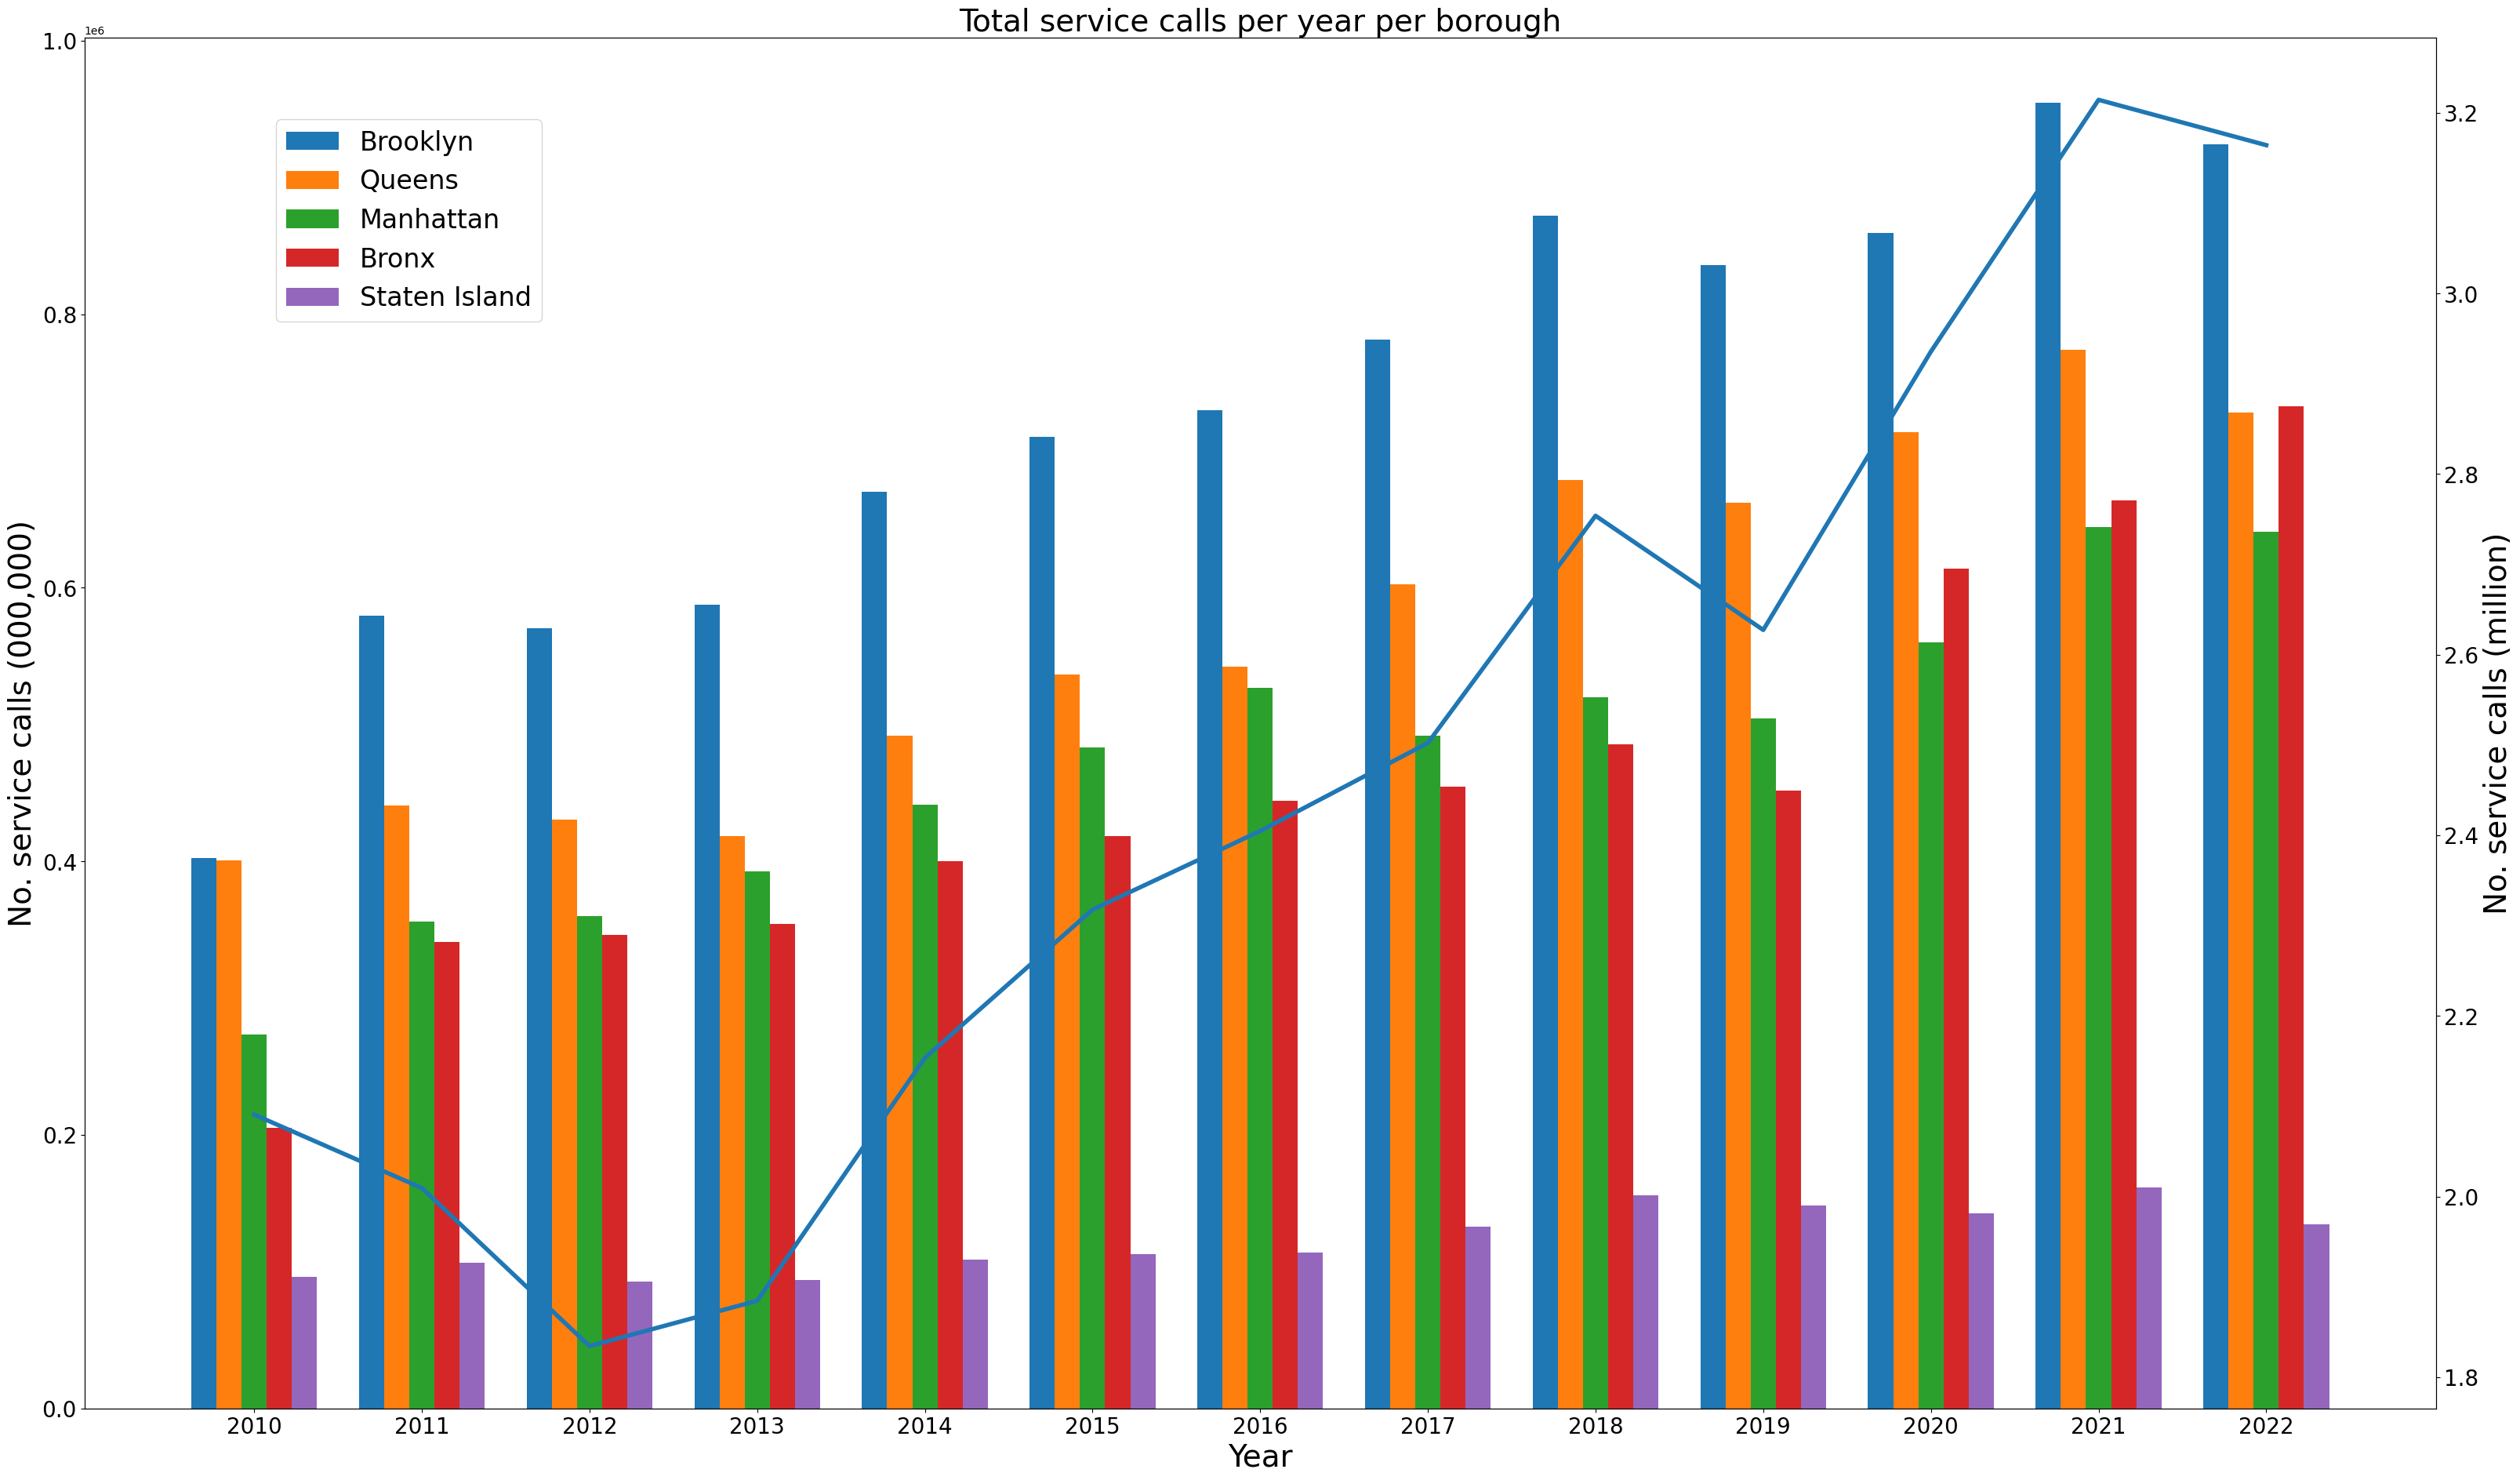

In [694]:
fig, ax = plt.subplots(figsize=(38.7,22.7))

ax.set_title('Total service calls per year per borough',fontsize=28)
ax.set_xlabel('Year',fontsize=28)
ax.set_ylabel('No. service calls (000,000)',fontsize=28)

width = 0.15
x = np.arange(len(services_borough_per_year['index']))
ax.set_xticks(x, services_borough_per_year['index'])

ax.bar(x - 2*width, services_borough_per_year['BROOKLYN'], width=width, label='Brooklyn')
ax.bar(x - width, services_borough_per_year['QUEENS'], width=width, label='Queens')
ax.bar(x, services_borough_per_year['MANHATTAN'], width=width, label='Manhattan')
ax.bar(x + width, services_borough_per_year['BRONX'], width=width, label='Bronx')
ax.bar(x + 2*width, services_borough_per_year['STATEN ISLAND'], width=width, label='Staten Island')

ax.legend(bbox_to_anchor=(0.2,0.95),fontsize=24)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

ax1 = ax.twinx()

ax1.set_ylabel('No. service calls (million)',fontsize=28)
ax1.plot(services_total_year['year'],services_total_year['total_requests'],linewidth=4)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

In [584]:
services_time_2010 = pd.DataFrame(services_2010['hour'].value_counts()).rename(columns={"hour": "count"})
services_time_2010 = services_time_2010.drop(index = '')
services_time_2010 = services_time_2010.sort_index()

services_time_2011 = pd.DataFrame(services_2011['hour'].value_counts()).rename(columns={"hour": "count"})
services_time_2011 = services_time_2011.drop(index = '')
services_time_2011 = services_time_2011.sort_index()

services_time_2012 = pd.DataFrame(services_2012['hour'].value_counts()).rename(columns={"hour": "count"})
services_time_2012 = services_time_2012.drop(index = '')
services_time_2012 = services_time_2012.sort_index()

services_time_2013 = pd.DataFrame(services_2013['hour'].value_counts()).rename(columns={"hour": "count"})
services_time_2013 = services_time_2013.drop(index = '')
services_time_2013 = services_time_2013.sort_index()

services_time_2014 = pd.DataFrame(services_2014['hour'].value_counts()).rename(columns={"hour": "count"})
services_time_2014 = services_time_2014.drop(index = '')
services_time_2014 = services_time_2014.sort_index()

services_time_2015 = pd.DataFrame(services_2015['hour'].value_counts()).rename(columns={"hour": "count"})
services_time_2015 = services_time_2015.drop(index = '')
services_time_2015 = services_time_2015.sort_index()

services_time_2016 = pd.DataFrame(services_2016['hour'].value_counts()).rename(columns={"hour": "count"})
services_time_2016 = services_time_2016.drop(index = '')
services_time_2016 = services_time_2016.sort_index()

services_time_2017 = pd.DataFrame(services_2017['hour'].value_counts()).rename(columns={"hour": "count"})
services_time_2017 = services_time_2017.drop(index = '')
services_time_2017 = services_time_2017.sort_index()

services_time_2018 = pd.DataFrame(services_2018['hour'].value_counts()).rename(columns={"hour": "count"})
services_time_2018 = services_time_2018.drop(index = '')
services_time_2018 = services_time_2018.sort_index()

services_time_2019 = pd.DataFrame(services_2019['hour'].value_counts()).rename(columns={"hour": "count"})
services_time_2019 = services_time_2019.drop(index = '')
services_time_2019 = services_time_2019.sort_index()

services_time_2020 = pd.DataFrame(services_2020['hour'].value_counts()).rename(columns={"hour": "count"})
services_time_2020 = services_time_2020.drop(index = '')
services_time_2020 = services_time_2020.sort_index()

services_time_2021 = pd.DataFrame(services_2021['hour'].value_counts()).rename(columns={"hour": "count"})
services_time_2021 = services_time_2021.drop(index = '')
services_time_2021 = services_time_2021.sort_index()

services_time_2022 = pd.DataFrame(services_2022['hour'].value_counts()).rename(columns={"hour": "count"})
services_time_2022 = services_time_2022.drop(index = '')
services_time_2022 = services_time_2022.sort_index()

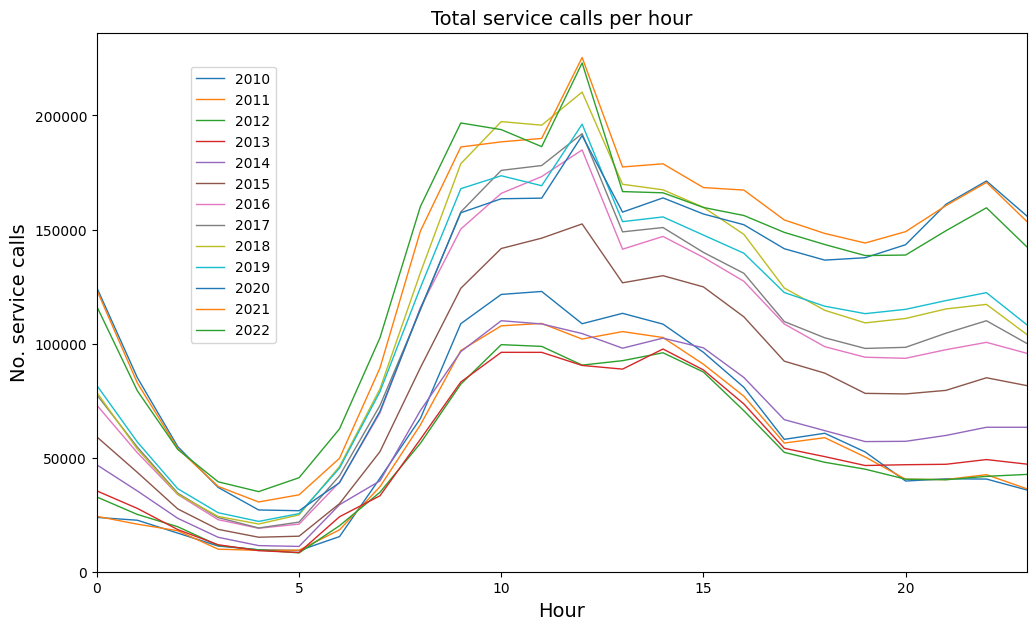

In [691]:
fig, ax = plt.subplots(figsize=(12,7))

ax.set_title('Total service calls per hour',fontsize=14)
ax.set_xlabel('Hour',fontsize=14)
ax.set_ylabel('No. service calls',fontsize=14)
ax.plot(services_time_2010['count'],linewidth=1,label='2010')
ax.plot(services_time_2011['count'],linewidth=1,label='2011')
ax.plot(services_time_2012['count'],linewidth=1,label='2012')
ax.plot(services_time_2013['count'],linewidth=1,label='2013')
ax.plot(services_time_2014['count'],linewidth=1,label='2014')
ax.plot(services_time_2015['count'],linewidth=1,label='2015')
ax.plot(services_time_2016['count'],linewidth=1,label='2016')
ax.plot(services_time_2017['count'],linewidth=1,label='2017')
ax.plot(services_time_2018['count'],linewidth=1,label='2018')
ax.plot(services_time_2019['count'],linewidth=1,label='2019')
ax.plot(services_time_2020['count'],linewidth=1,label='2020')
ax.plot(services_time_2021['count'],linewidth=1,label='2021')
ax.plot(services_time_2022['count'],linewidth=1,label='2022')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.xlim(0,23)
plt.ylim(0)

ax.legend(bbox_to_anchor=(0.2,0.95),fontsize=10)

In [648]:
nypd_2010 = services_2010.loc[services_2010['grouped_agency'] == 'Police']
nypd_2011 = services_2011.loc[services_2011['grouped_agency'] == 'Police']
nypd_2012 = services_2012.loc[services_2012['grouped_agency'] == 'Police']
nypd_2013 = services_2013.loc[services_2013['grouped_agency'] == 'Police']
nypd_2014 = services_2014.loc[services_2014['grouped_agency'] == 'Police']
nypd_2015 = services_2015.loc[services_2015['grouped_agency'] == 'Police']
nypd_2016 = services_2016.loc[services_2016['grouped_agency'] == 'Police']
nypd_2017 = services_2017.loc[services_2017['grouped_agency'] == 'Police']
nypd_2018 = services_2018.loc[services_2018['grouped_agency'] == 'Police']
nypd_2019 = services_2019.loc[services_2019['grouped_agency'] == 'Police']
nypd_2020 = services_2020.loc[services_2020['grouped_agency'] == 'Police']
nypd_2021 = services_2021.loc[services_2021['grouped_agency'] == 'Police']
nypd_2022 = services_2022.loc[services_2022['grouped_agency'] == 'Police']

health_2010 = services_2010.loc[services_2010['grouped_agency'] == 'Health']
health_2011 = services_2011.loc[services_2011['grouped_agency'] == 'Health']
health_2012 = services_2012.loc[services_2012['grouped_agency'] == 'Health']
health_2013 = services_2013.loc[services_2013['grouped_agency'] == 'Health']
health_2014 = services_2014.loc[services_2014['grouped_agency'] == 'Health']
health_2015 = services_2015.loc[services_2015['grouped_agency'] == 'Health']
health_2016 = services_2016.loc[services_2016['grouped_agency'] == 'Health']
health_2017 = services_2017.loc[services_2017['grouped_agency'] == 'Health']
health_2018 = services_2018.loc[services_2018['grouped_agency'] == 'Health']
health_2019 = services_2019.loc[services_2019['grouped_agency'] == 'Health']
health_2020 = services_2020.loc[services_2020['grouped_agency'] == 'Health']
health_2021 = services_2021.loc[services_2021['grouped_agency'] == 'Health']
health_2022 = services_2022.loc[services_2022['grouped_agency'] == 'Health']

In [649]:
nypd_total = nypd_2010.append([nypd_2011,
                               nypd_2012,
                               nypd_2013,
                               nypd_2014,
                               nypd_2015,
                               nypd_2016,
                               nypd_2017,
                               nypd_2018,
                               nypd_2019,
                               nypd_2020,
                               nypd_2021,
                               nypd_2022])

health_total = health_2010.append([health_2011,
                                   health_2012,
                                   health_2013,
                                   health_2014,
                                   health_2015,
                                   health_2016,
                                   health_2017,
                                   health_2018,
                                   health_2019,
                                   health_2020,
                                   health_2021,
                                   health_2022])

/var/folders/pg/zlf6czm17_1310xd40tz8c5h0000gn/T/ipykernel_13793/458286879.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/pg/zlf6czm17_1310xd40tz8c5h0000gn/T/ipykernel_13793/458286879.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [664]:
sanitation_2010 = services_2010.loc[services_2010['grouped_agency'] == 'Sanitation']
sanitation_2011 = services_2011.loc[services_2011['grouped_agency'] == 'Sanitation']
sanitation_2012 = services_2012.loc[services_2012['grouped_agency'] == 'Sanitation']
sanitation_2013 = services_2013.loc[services_2013['grouped_agency'] == 'Sanitation']
sanitation_2014 = services_2014.loc[services_2014['grouped_agency'] == 'Sanitation']
sanitation_2015 = services_2015.loc[services_2015['grouped_agency'] == 'Sanitation']
sanitation_2016 = services_2016.loc[services_2016['grouped_agency'] == 'Sanitation']
sanitation_2017 = services_2017.loc[services_2017['grouped_agency'] == 'Sanitation']
sanitation_2018 = services_2018.loc[services_2018['grouped_agency'] == 'Sanitation']
sanitation_2019 = services_2019.loc[services_2019['grouped_agency'] == 'Sanitation']
sanitation_2020 = services_2020.loc[services_2020['grouped_agency'] == 'Sanitation']
sanitation_2021 = services_2021.loc[services_2021['grouped_agency'] == 'Sanitation']
sanitation_2022 = services_2022.loc[services_2022['grouped_agency'] == 'Sanitation']

In [665]:
sanitation_total = sanitation_2010.append([sanitation_2011,
                                   sanitation_2012,
                                   sanitation_2013,
                                   sanitation_2014,
                                   sanitation_2015,
                                   sanitation_2016,
                                   sanitation_2017,
                                   sanitation_2018,
                                   sanitation_2019,
                                   sanitation_2020,
                                   sanitation_2021,
                                   sanitation_2022])

/var/folders/pg/zlf6czm17_1310xd40tz8c5h0000gn/T/ipykernel_13793/3414546491.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [671]:
transportation_2010 = services_2010.loc[services_2010['grouped_agency'] == 'Transportation']
transportation_2011 = services_2011.loc[services_2011['grouped_agency'] == 'Transportation']
transportation_2012 = services_2012.loc[services_2012['grouped_agency'] == 'Transportation']
transportation_2013 = services_2013.loc[services_2013['grouped_agency'] == 'Transportation']
transportation_2014 = services_2014.loc[services_2014['grouped_agency'] == 'Transportation']
transportation_2015 = services_2015.loc[services_2015['grouped_agency'] == 'Transportation']
transportation_2016 = services_2016.loc[services_2016['grouped_agency'] == 'Transportation']
transportation_2017 = services_2017.loc[services_2017['grouped_agency'] == 'Transportation']
transportation_2018 = services_2018.loc[services_2018['grouped_agency'] == 'Transportation']
transportation_2019 = services_2019.loc[services_2019['grouped_agency'] == 'Transportation']
transportation_2020 = services_2020.loc[services_2020['grouped_agency'] == 'Transportation']
transportation_2021 = services_2021.loc[services_2021['grouped_agency'] == 'Transportation']
transportation_2022 = services_2022.loc[services_2022['grouped_agency'] == 'Transportation']

In [672]:
transportation_total = transportation_2010.append([transportation_2011,
                                                   transportation_2012,
                                                   transportation_2013,
                                                   transportation_2014,
                                                   transportation_2015,
                                                   transportation_2016,
                                                   transportation_2017,
                                                   transportation_2018,
                                                   transportation_2019,
                                                   transportation_2020,
                                                   transportation_2021,
                                                   transportation_2022])

/var/folders/pg/zlf6czm17_1310xd40tz8c5h0000gn/T/ipykernel_13793/1800530525.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [650]:
services_man_2010 = services_2010.loc[services_2010['borough'] == 'MANHATTAN']
services_man_2011 = services_2011.loc[services_2011['borough'] == 'MANHATTAN']
services_man_2012 = services_2012.loc[services_2012['borough'] == 'MANHATTAN']
services_man_2013 = services_2013.loc[services_2013['borough'] == 'MANHATTAN']
services_man_2014 = services_2014.loc[services_2014['borough'] == 'MANHATTAN']
services_man_2015 = services_2015.loc[services_2015['borough'] == 'MANHATTAN']
services_man_2016 = services_2016.loc[services_2016['borough'] == 'MANHATTAN']
services_man_2017 = services_2017.loc[services_2017['borough'] == 'MANHATTAN']
services_man_2018 = services_2018.loc[services_2018['borough'] == 'MANHATTAN']
services_man_2019 = services_2019.loc[services_2019['borough'] == 'MANHATTAN']
services_man_2020 = services_2020.loc[services_2020['borough'] == 'MANHATTAN']
services_man_2021 = services_2021.loc[services_2021['borough'] == 'MANHATTAN']
services_man_2022 = services_2022.loc[services_2022['borough'] == 'MANHATTAN']

services_man_total = services_man_2010.append([services_man_2011,
                                               services_man_2012,
                                               services_man_2013,
                                               services_man_2014,
                                               services_man_2015,
                                               services_man_2016,
                                               services_man_2017,
                                               services_man_2018,
                                               services_man_2019,
                                               services_man_2020,
                                               services_man_2021,
                                               services_man_2022])

#services_man_total

/var/folders/pg/zlf6czm17_1310xd40tz8c5h0000gn/T/ipykernel_13793/1211589624.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [599]:
services_sti_2010 = services_2010.loc[services_2010['borough'] == 'STATEN ISLAND']
services_sti_2011 = services_2011.loc[services_2011['borough'] == 'STATEN ISLAND']
services_sti_2012 = services_2012.loc[services_2012['borough'] == 'STATEN ISLAND']
services_sti_2013 = services_2013.loc[services_2013['borough'] == 'STATEN ISLAND']
services_sti_2014 = services_2014.loc[services_2014['borough'] == 'STATEN ISLAND']
services_sti_2015 = services_2015.loc[services_2015['borough'] == 'STATEN ISLAND']
services_sti_2016 = services_2016.loc[services_2016['borough'] == 'STATEN ISLAND']
services_sti_2017 = services_2017.loc[services_2017['borough'] == 'STATEN ISLAND']
services_sti_2018 = services_2018.loc[services_2018['borough'] == 'STATEN ISLAND']
services_sti_2019 = services_2019.loc[services_2019['borough'] == 'STATEN ISLAND']
services_sti_2020 = services_2020.loc[services_2020['borough'] == 'STATEN ISLAND']
services_sti_2021 = services_2021.loc[services_2021['borough'] == 'STATEN ISLAND']
services_sti_2022 = services_2022.loc[services_2022['borough'] == 'STATEN ISLAND']

services_sti_total = services_sti_2010.append([services_sti_2011,
                                               services_sti_2012,
                                               services_sti_2013,
                                               services_sti_2014,
                                               services_sti_2015,
                                               services_sti_2016,
                                               services_sti_2017,
                                               services_sti_2018,
                                               services_sti_2019,
                                               services_sti_2020,
                                               services_sti_2021,
                                               services_sti_2022])

#services_sti_total

/var/folders/pg/zlf6czm17_1310xd40tz8c5h0000gn/T/ipykernel_13793/1113296743.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [601]:
services_que_2010 = services_2010.loc[services_2010['borough'] == 'QUEENS']
services_que_2011 = services_2011.loc[services_2011['borough'] == 'QUEENS']
services_que_2012 = services_2012.loc[services_2012['borough'] == 'QUEENS']
services_que_2013 = services_2013.loc[services_2013['borough'] == 'QUEENS']
services_que_2014 = services_2014.loc[services_2014['borough'] == 'QUEENS']
services_que_2015 = services_2015.loc[services_2015['borough'] == 'QUEENS']
services_que_2016 = services_2016.loc[services_2016['borough'] == 'QUEENS']
services_que_2017 = services_2017.loc[services_2017['borough'] == 'QUEENS']
services_que_2018 = services_2018.loc[services_2018['borough'] == 'QUEENS']
services_que_2019 = services_2019.loc[services_2019['borough'] == 'QUEENS']
services_que_2020 = services_2020.loc[services_2020['borough'] == 'QUEENS']
services_que_2021 = services_2021.loc[services_2021['borough'] == 'QUEENS']
services_que_2022 = services_2022.loc[services_2022['borough'] == 'QUEENS']

services_que_total = services_que_2010.append([services_que_2011,
                                               services_que_2012,
                                               services_que_2013,
                                               services_que_2014,
                                               services_que_2015,
                                               services_que_2016,
                                               services_que_2017,
                                               services_que_2018,
                                               services_que_2019,
                                               services_que_2020,
                                               services_que_2021,
                                               services_que_2022])

#services_que_total

/var/folders/pg/zlf6czm17_1310xd40tz8c5h0000gn/T/ipykernel_13793/2705777428.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [602]:
services_broo_2010 = services_2010.loc[services_2010['borough'] == 'BROOKLYN']
services_broo_2011 = services_2011.loc[services_2011['borough'] == 'BROOKLYN']
services_broo_2012 = services_2012.loc[services_2012['borough'] == 'BROOKLYN']
services_broo_2013 = services_2013.loc[services_2013['borough'] == 'BROOKLYN']
services_broo_2014 = services_2014.loc[services_2014['borough'] == 'BROOKLYN']
services_broo_2015 = services_2015.loc[services_2015['borough'] == 'BROOKLYN']
services_broo_2016 = services_2016.loc[services_2016['borough'] == 'BROOKLYN']
services_broo_2017 = services_2017.loc[services_2017['borough'] == 'BROOKLYN']
services_broo_2018 = services_2018.loc[services_2018['borough'] == 'BROOKLYN']
services_broo_2019 = services_2019.loc[services_2019['borough'] == 'BROOKLYN']
services_broo_2020 = services_2020.loc[services_2020['borough'] == 'BROOKLYN']
services_broo_2021 = services_2021.loc[services_2021['borough'] == 'BROOKLYN']
services_broo_2022 = services_2022.loc[services_2022['borough'] == 'BROOKLYN']

services_broo_total = services_broo_2010.append([services_broo_2011,
                                                 services_broo_2012,
                                                 services_broo_2013,
                                                 services_broo_2014,
                                                 services_broo_2015,
                                                 services_broo_2016,
                                                 services_broo_2017,
                                                 services_broo_2018,
                                                 services_broo_2019,
                                                 services_broo_2020,
                                                 services_broo_2021,
                                                 services_broo_2022])

#services_broo_total

/var/folders/pg/zlf6czm17_1310xd40tz8c5h0000gn/T/ipykernel_13793/2868049567.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [606]:
services_brx_2010 = services_2010.loc[services_2010['borough'] == 'BRONX']
services_brx_2011 = services_2011.loc[services_2011['borough'] == 'BRONX']
services_brx_2012 = services_2012.loc[services_2012['borough'] == 'BRONX']
services_brx_2013 = services_2013.loc[services_2013['borough'] == 'BRONX']
services_brx_2014 = services_2014.loc[services_2014['borough'] == 'BRONX']
services_brx_2015 = services_2015.loc[services_2015['borough'] == 'BRONX']
services_brx_2016 = services_2016.loc[services_2016['borough'] == 'BRONX']
services_brx_2017 = services_2017.loc[services_2017['borough'] == 'BRONX']
services_brx_2018 = services_2018.loc[services_2018['borough'] == 'BRONX']
services_brx_2019 = services_2019.loc[services_2019['borough'] == 'BRONX']
services_brx_2020 = services_2020.loc[services_2020['borough'] == 'BRONX']
services_brx_2021 = services_2021.loc[services_2021['borough'] == 'BRONX']
services_brx_2022 = services_2022.loc[services_2022['borough'] == 'BRONX']

services_brx_total = services_brx_2010.append([services_brx_2011,
                                               services_brx_2012,
                                               services_brx_2013,
                                               services_brx_2014,
                                               services_brx_2015,
                                               services_brx_2016,
                                               services_brx_2017,
                                               services_brx_2018,
                                               services_brx_2019,
                                               services_brx_2020,
                                               services_brx_2021,
                                               services_brx_2022])

#services_brx_total

/var/folders/pg/zlf6czm17_1310xd40tz8c5h0000gn/T/ipykernel_13793/2868780459.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [651]:
top_man = pd.DataFrame(services_man_total['incident_zip'].value_counts())
top_que = pd.DataFrame(services_que_total['incident_zip'].value_counts())
top_broo = pd.DataFrame(services_broo_total['incident_zip'].value_counts())
top_sti = pd.DataFrame(services_sti_total['incident_zip'].value_counts())
top_brx = pd.DataFrame(services_brx_total['incident_zip'].value_counts())

In [652]:
top_man.rename(columns={"indicent_zip": "count"})
top_man = top_man.drop(index = '')

top_que.rename(columns={"indicent_zip": "count"})
top_que = top_que.drop(index = '')

top_broo.rename(columns={"indicent_zip": "count"})
top_broo = top_broo.drop(index = '')

top_sti.rename(columns={"indicent_zip": "count"})
top_sti = top_sti.drop(index = '')

top_brx.rename(columns={"indicent_zip": "count"})
top_brx = top_brx.drop(index = '')

In [653]:
top_man["zip"] = top_man.index
top_que["zip"] = top_que.index
top_sti["zip"] = top_sti.index
top_broo["zip"] = top_broo.index
top_brx["zip"] = top_brx.index

In [655]:
top_man.head()

,incident_zip,zip
10031,321797,10031
10032,287549,10032
10025,247584,10025
10002,242063,10002
10033,236561,10033


In [656]:
top_que.head()

,incident_zip,zip
11385,405330,11385
11368,254897,11368
11377,237826,11377
11373,224564,11373
11419,195819,11419


In [657]:
top_sti.head()

,incident_zip,zip
10314,259462,10314
10312,193043,10312
10306,191897,10306
10301,163286,10301
10304,151638,10304


In [658]:
top_broo.head()

,incident_zip,zip
11226,499558,11226
11207,389817,11207
11221,362357,11221
11208,351321,11208
11233,300169,11233


In [659]:
top_brx.head()

,incident_zip,zip
10466,455964,10466
10467,430022,10467
10468,366923,10468
10458,366676,10458
10457,363028,10457


In [674]:
nypd_complaint = pd.DataFrame(nypd_total['complaint_type'].value_counts())
nypd_zip = pd.DataFrame(nypd_total['incident_zip'].value_counts())

nypd_zip.head()

,incident_zip
10466,284273
11385,152293
11226,141513
10468,126814
10467,126725


In [675]:
health_complaint = pd.DataFrame(health_total['complaint_type'].value_counts())
health_zip = pd.DataFrame(health_total['incident_zip'].value_counts())

health_zip.head()

,incident_zip
10025,12881
11221,12790
11216,11515
11226,10964
11238,10390


In [678]:
sanitation_complaint = pd.DataFrame(sanitation_total['complaint_type'].value_counts())
sanitation_zip = pd.DataFrame(sanitation_total['incident_zip'].value_counts())
sanitation_zip = sanitation_zip.drop(index = '')

sanitation_zip.head()

,incident_zip
11385,71543
10314,68585
11215,59979
11234,57831
10312,55338


In [679]:
transportation_complaint = pd.DataFrame(transportation_total['complaint_type'].value_counts())
transportation_zip = pd.DataFrame(transportation_total['incident_zip'].value_counts())
transportation_zip = transportation_zip.drop(index = '')

transportation_zip.head()

,incident_zip
10314,53235
11385,43491
10312,41365
10306,39298
11207,38841
